<a href="https://colab.research.google.com/github/arman-aminian/cafe_bazaar_data_scientist_entrace_task/blob/master/Summer_Camp_P2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Parameters**

In [ ]:
LOCAL_RUN = True
DATASET_PATH = '/content/gdrive/My Drive/data/Summer Camp/Problem2/'

# **Packages**

## Install

In [ ]:
!pip install -q transformers
!pip install -q hazm
!pip install -q clean-text

In [ ]:
!git clone https://github.com/kharazi/persian-stopwords.git

Cloning into 'persian-stopwords'...
remote: Enumerating objects: 43, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 43 (delta 0), reused 0 (delta 0), pack-reused 40
Unpacking objects: 100% (43/43), done.


In [ ]:
!git clone https://github.com/keras-team/keras-tuner

Cloning into 'keras-tuner'...
remote: Enumerating objects: 7036, done.
remote: Counting objects: 100% (394/394), done.
remote: Compressing objects: 100% (168/168), done.
remote: Total 7036 (delta 212), reused 371 (delta 209), pack-reused 6642
Receiving objects: 100% (7036/7036), 1.51 MiB | 1.27 MiB/s, done.
Resolving deltas: 100% (4917/4917), done.


In [ ]:
cd keras-tuner/

/Users/arman/keras-tuner


In [ ]:
!pip install .

In [ ]:
cd ..

/Users/arman


In [ ]:
cd persian-stopwords

/Users/arman/persian-stopwords


In [ ]:
my_file = open("persian", "r")
content = my_file.read()
stopwords1 = content.split("\n")
stopwords1 = stopwords1[:-1]
my_file.close()
my_file = open("short", "r")
content = my_file.read()
stopwords2 = content.split("\n")
stopwords2 = stopwords2[:-1]
my_file.close()
my_file = open("verbal", "r")
content = my_file.read()
stopwords3 = content.split("\n")
stopwords3 = stopwords3[:-1]
my_file.close()
my_file = open("nonverbal", "r")
content = my_file.read()
stopwords4 = content.split("\n")
stopwords4 = stopwords4[:-1]
my_file.close()

In [ ]:
cd ..

/Users/arman


## Import

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC, SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

import hazm
from cleantext import clean

import os
import re
import json
import copy
import collections

# **Dataset**

### Load Dataset

In [ ]:
if not LOCAL_RUN:
  from google.colab import drive
  drive.mount('/content/gdrive')

In [ ]:
if not LOCAL_RUN:
  train = pd.read_csv(DATASET_PATH + 'train_set.csv', index_col='app_id')
  test = pd.read_csv(DATASET_PATH + 'test_set.csv', index_col='app_id')

In [ ]:
cd Documents/Uni/Summer\ Camp/Problem 2

/Users/arman/Documents/Uni/Summer Camp/Problem 2


In [ ]:
if LOCAL_RUN:
  train = pd.read_csv('./dataset/train_set.csv', index_col='app_id')
  test = pd.read_csv('./dataset/test_set.csv', index_col='app_id')

In [ ]:
training_data, validation_data = train_test_split(train, test_size=0.1, random_state=41, shuffle=True)

# **Global Helper Functions**

## Save Model

In [ ]:
# define ordinal encoding
encoder = OrdinalEncoder()
# transform data
train_categories = encoder.fit_transform(train.label.values.reshape(-1, 1))
print(train_categories)

[[1.]
 [1.]
 [7.]
 ...
 [7.]
 [1.]
 [0.]]


In [ ]:
def saveModelResult(model, test_set, file_name):
  predicted = model.predict(test_set)
  predicted_transformed = encoder.inverse_transform(predicted.reshape(-1, 1))
  res = pd.DataFrame({'app_id': test_clean.index.values, 'label': predicted_transformed[:,0]})
  print(res.head())
  res.to_csv(file_name, index=False)
  print(file_name, ' saved!')
  return res

In [ ]:
def eval(y_pred, y_test):
  acc = accuracy_score(y_test, y_pred)
  print('Accuracy: %.3f' % acc)

## Class weight

In [ ]:
from sklearn.utils import class_weight

yy = training_data_clean.label
weights = class_weight.compute_class_weight('balanced',
                                            np.unique(yy),
                                            yy)
class_weights = {c : w for c, w in enumerate(weights)}

/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass classes=[0 1 2 3 4 5 6 7 8 9], y=app_id
35804    1
23770    3
10984    9
3442     8
7806     5
        ..
27064    6
31597    6
20450    3
931      8
34752    2
Name: label, Length: 34109, dtype: int64 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


# **Visualize Data**

## Helper functions

In [ ]:
def data_between(data, min_value=5, max_value=50):
  len_by_words = data.apply(lambda t: len(hazm.word_tokenize(t)))
  data_length = len_by_words.values

  data_passed = sum([1 for length in data_length if min_value < length <= max_value])
  data_passed_rate = (data_passed / len(data_length)) * 100
  print(f'Texts with word length between {min_value} and {max_value} includes {data_passed_rate:.2f}% of the whole')

## Visualize

In [ ]:
print("train shape :", train.shape)
train.head()

train shape : (37899, 2)


,description_fa,label
app_id,,
0,<p>بازی مین روب یک برنامه فکری است که باید مین...,1
1,<p>دراین بازی تعدادی عکس برای شما نشان داده می...,1
2,<br>تلاش نافرجام برای درک «بوفالو»<br>مرگ پایا...,7
3,<p>فیلم نما ، برنامه ای برای دانلود و پخش آنلا...,7
4,<p>* این برنامه حاوی بیش از 500 عکس و ژست برای...,7


(array([4000., 4000., 3965., 4000., 4000., 1934., 4000., 4000., 4000.,
        4000.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

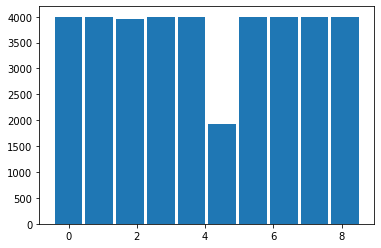

In [ ]:
# label frequency
plt.hist(train.label, rwidth=0.9, align='left')

min: 3 
max: 2387


(array([3.2068e+04, 4.5790e+03, 8.7700e+02, 3.4300e+02, 2.5000e+01,
        4.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00, 1.0000e+00]),
 array([   3. ,  241.4,  479.8,  718.2,  956.6, 1195. , 1433.4, 1671.8,
        1910.2, 2148.6, 2387. ]),
 <BarContainer object of 10 artists>)

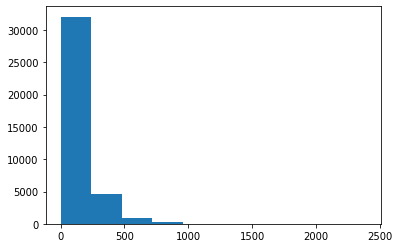

In [ ]:
# row len by words
len_by_words = train.description_fa.apply(lambda t: len(hazm.word_tokenize(t)))
print(f'min: {len_by_words.min()} \nmax: {len_by_words.max()}')
plt.hist(len_by_words)

<AxesSubplot:xlabel='description_fa'>

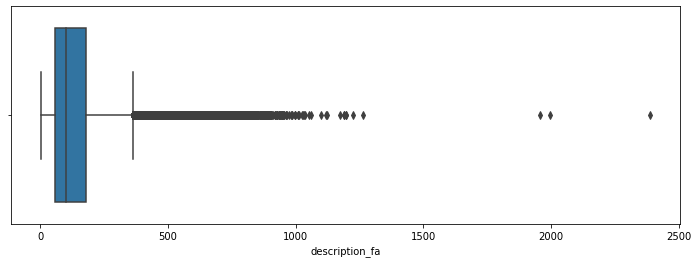

In [ ]:
# outliers based on words len
plt.figure(figsize=(12,4))
sns.boxplot(x=len_by_words)

In [ ]:
data_between(train.description_fa, 3, 400)

Texts with word length between 3 and 400 includes 94.81% of the whole


In [ ]:
MAX_LEN = 400
MIN_LEN = 3

In [ ]:
# rows with same descriptoin_fa

print("duplicated :", len(train[train.duplicated()]))
print("duplicated based on description_fa :", len(train[train.duplicated('description_fa')]))

duplicated : 1041
duplicated based on description_fa : 1166


# **Preprocess**

## Helper Functions

In [ ]:
# remove duplicated rows
def remove_duplicated(data):
  data = data.drop_duplicates(subset=['description_fa'], keep='first')
  data = data.reset_index(drop=True)
  return data

In [ ]:
# remove rows with the length of fewer than three words
def remove_outliers(data):
  data['description_fa'] = data['description_fa'].apply(lambda t: t if MIN_LEN < len(hazm.word_tokenize(t)) <= MAX_LEN else None)
  data = data.dropna(subset=['description_fa'])
  data = data.reset_index(drop=True)
  return data

In [ ]:
def isEnglish(s):
    return s.lower().islower()

In [ ]:
def get_total_stopwords():
  return set(stopwords1 + stopwords2 + stopwords3 + stopwords4)

In [ ]:
def cleaning(text):
  # remove spaces
  text = text.strip()
  
  # regular cleaning
  text = clean(text,
               fix_unicode=True,
               to_ascii=False,
               lower=True,
               no_line_breaks=True,
               no_urls=True,
               no_emails=True,
               no_phone_numbers=True,
               no_numbers=True,
               no_digits=True,
               no_currency_symbols=True,
               no_punct=True,
               replace_with_url="URL",
               replace_with_email="EMAIL",
               replace_with_phone_number="",
               replace_with_number="NUM",
               replace_with_digit="DIGIT",
               replace_with_currency_symbol="",
               )

  # cleaning htmls
  cleanr = re.compile('<.*?>')
  text = re.sub(cleanr, 'HTML', text)
   
  # normalizing
  normalizer = hazm.Normalizer()
  text = normalizer.normalize(text)
    
  # removing wierd patterns
  wierd_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u'\U00010000-\U0010ffff'
        u"\u200d"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\u3030"
        u"\ufe0f"
        u"\u2069"
        u"\u2066"
        # u"\u200c"
        u"\u2068"
        u"\u2067"
        "]+", flags=re.UNICODE)
    
  text = wierd_pattern.sub(r'', text)
    
  # removing extra spaces, hashtags
  text = re.sub("#", "", text)
  text = re.sub("\s+", " ", text)

  words = hazm.word_tokenize(text)
  words = [word for word in words if word not in get_total_stopwords()]
  # words = [word for word in words if not isEnglish(word)]
  text = " ".join(words)
    
  return text

In [ ]:
def preprocess(data, is_train=True):
  data_clean = data.copy()
  # if is_train:
  #   data_clean = remove_duplicated(data_clean)
  #   data_clean = remove_outliers(data_clean)

  data_clean.description_fa = data_clean.description_fa.apply(cleaning)
  return data_clean

## Preprocessing

In [ ]:
train.head()

,description_fa,label
app_id,,
0,<p>بازی مین روب یک برنامه فکری است که باید مین...,1
1,<p>دراین بازی تعدادی عکس برای شما نشان داده می...,1
2,<br>تلاش نافرجام برای درک «بوفالو»<br>مرگ پایا...,7
3,<p>فیلم نما ، برنامه ای برای دانلود و پخش آنلا...,7
4,<p>* این برنامه حاوی بیش از 500 عکس و ژست برای...,7


In [ ]:
train.description_fa.iloc[0]

'<p>بازی مین روب یک برنامه فکری است که باید مین های موجود در صفحه بازی را کشف کنید .قابلیت های این برنامه عبارتند از : <br> </br></p> <p>- دارای سطوح مختلف دشواری از آسان به سخت <br> </br></p> <p>- امکان تعریف بازی سفارشی <br> </br></p> <p>- نمایش آمار بازی ها و عملکرد شما <br> </br></p> <p>- ذخیره تمام بازی های ناتمام، در این صورت میتوانید در آینده به قسمت بازی های ذخیره شده مراجعه کنید و بازی را ادامه دهید. <br> </br></p> <p>از سایر برنامه و بازی های متنوع ما نیز دیدن کنید. <br> </br></p> <p>سپاسگزارم. <br> </br></p>'

In [ ]:
train_clean = preprocess(train)

In [ ]:
training_data_clean = preprocess(training_data)
validation_data_clean = preprocess(validation_data, False)

In [ ]:
X_train, y_train = training_data_clean.description_fa.values.tolist(), training_data_clean.label.values.tolist()
X_valid, y_valid = validation_data_clean.description_fa.values.tolist(), validation_data_clean.label.values.tolist()

In [ ]:
test_clean = preprocess(test, is_train=False)

In [ ]:
print("raw train data shape :", train.shape)
print("clean train data shape :", train_clean.shape)

raw train data shape : (37899, 2)
clean train data shape : (37899, 2)


In [ ]:
train_clean.head()

,description_fa,label
app_id,,
0,HTMLبازی مین برنامه فکری مین‌های موجود صفحه با...,1
1,HTMLدراین بازی عکس داده_می‌شود خاطر سپرده جواب...,1
2,HTMLتلاش نافرجام درک بوفالو HTMLمرگ پایان ماجر...,7
3,HTMLفیلم نما برنامه‌ای دانلود پخش آنلاین فیلم ...,7
4,HTML* برنامه حاوی num عکس ژست مدل عکاسی شدنه ک...,7


In [ ]:
train_clean.description_fa.iloc[0]

'HTMLبازی مین برنامه فکری مین\u200cهای موجود صفحه بازی کشف قابلیت\u200cهای برنامه HTML HTMLHTML HTML- دارای سطوح دشواری HTML HTMLHTML HTML- امکان تعریف بازی سفارشی HTML HTMLHTML HTML- نمایش آمار بازی\u200cها عملکرد HTML HTMLHTML HTML- ذخیره بازی\u200cهای ناتمام میتوانید آینده قسمت بازی\u200cهای ذخیره مراجعه بازی ادامه HTML HTMLHTML HTMLاز برنامه بازی\u200cهای متنوع دیدن HTML HTMLHTML HTMLسپاسگزارم HTML HTMLHTML'

# **Models**

## LSTM - 72.3% accuracy

In [ ]:
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D, Bidirectional, GlobalMaxPooling1D, Conv1D, MaxPooling1D, Dropout, Conv1D, GlobalMaxPool1D, Activation
from sklearn.utils import class_weight

In [ ]:
MAX_NB_WORDS = 30000
MAX_SEQUENCE_LENGTH = 150
EMBEDDING_DIM = 100

tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(train_clean.description_fa.values)
word_index = tokenizer.word_index

X = tokenizer.texts_to_sequences(train_clean.description_fa.values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)

Y = pd.get_dummies(train_clean.label.values).values

x_test = tokenizer.texts_to_sequences(test_clean.description_fa.values)
x_test = pad_sequences(x_test, maxlen=MAX_SEQUENCE_LENGTH)

In [ ]:
yy = np.argmax(Y, axis=1)
weights = class_weight.compute_class_weight('balanced',
                                            np.unique(yy),
                                            yy)
class_weights = {c : w for c, w in enumerate(weights)}

In [ ]:
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(400, dropout=0.5))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
print(model.summary())

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_12 (Embedding)     (None, 150, 100)          1000000   
_________________________________________________________________
spatial_dropout1d_12 (Spatia (None, 150, 100)          0         
_________________________________________________________________
lstm_12 (LSTM)               (None, 400)               801600    
_________________________________________________________________
dense_12 (Dense)             (None, 10)                4010      
Total params: 1,805,610
Trainable params: 1,805,610
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
epochs = 7
batch_size = 64

history = model.fit(X, Y, shuffle=True, epochs=epochs, batch_size=batch_size,validation_split=0.1, class_weight=class_weights)

Epoch 1/7
490/490 [==============================] - 17s 32ms/step - loss: 1.9472 - accuracy: 0.2417 - val_loss: 1.3676 - val_accuracy: 0.4930
Epoch 2/7
490/490 [==============================] - 16s 32ms/step - loss: 1.2252 - accuracy: 0.5205 - val_loss: 1.1991 - val_accuracy: 0.5430
Epoch 3/7
490/490 [==============================] - 15s 32ms/step - loss: 0.9881 - accuracy: 0.6505 - val_loss: 1.0536 - val_accuracy: 0.6269
Epoch 4/7
490/490 [==============================] - 15s 31ms/step - loss: 0.8545 - accuracy: 0.7022 - val_loss: 0.9784 - val_accuracy: 0.6712
Epoch 5/7
490/490 [==============================] - 15s 31ms/step - loss: 0.7944 - accuracy: 0.7202 - val_loss: 0.9157 - val_accuracy: 0.6945
Epoch 6/7
490/490 [==============================] - 15s 31ms/step - loss: 0.7389 - accuracy: 0.7401 - val_loss: 0.8281 - val_accuracy: 0.7068
Epoch 7/7
490/490 [==============================] - 15s 30ms/step - loss: 0.7027 - accuracy: 0.7545 - val_loss: 0.9353 - val_accuracy: 0.6890

In [ ]:
history = model.fit(X, Y, shuffle=True, epochs=1, batch_size=batch_size,validation_split=0.1, class_weight=class_weights)

490/490 [==============================] - 15s 31ms/step - loss: 0.6765 - accuracy: 0.7620 - val_loss: 0.8235 - val_accuracy: 0.7097


In [ ]:
saveModelResult(model2, x_test, "model_lstm_300")

### parameter tuner

In [ ]:
import kerastuner as kt
from kerastuner import HyperModel

class HyperModel(HyperModel):
    def __init__(self, input_shape):
        self.input_shape = input_shape

    def build(self, hp):
      model = Sequential()
      model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=input_shape))
      model.add(SpatialDropout1D(hp.Float('drop1', 0.4, 0.6, default=0.4)))
      model.add(Bidirectional(LSTM(hp.Int('lstm', 400, 600, default=400), dropout=hp.Float('drop1z', 0.5, 0.6, default=0.5))))
      model.add(Dense(10, activation='softmax'))
      model.compile(loss=hp.choice('loss', values=['mse', 'categorical_crossentropy'], default='categorical_crossentropy'),
                    optimizer=hp.Choice('optimizer', values=['adam', 'rmsprop'], default='rmsprop'),
                    metrics=['accuracy'])
      return model

In [ ]:
input_shape = (X.shape[1])
hypermodel = HyperModel(input_shape)

In [ ]:
tuner_rs = kt.tuners.randomsearch.RandomSearch(
            hypermodel,
            objective='mse',
            seed=42,
            max_trials=7,
            executions_per_trial=2)

In [ ]:
tuner_rs.search(X, Y, epochs=7, validation_split=0.1, verbose=0)

### bidirectional lstm

In [ ]:
model3 = Sequential()
model3.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model3.add(SpatialDropout1D(0.4))
model3.add(Bidirectional(LSTM(400, dropout=0.5)))
model3.add(Dense(10, activation='softmax'))
model3.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
print(model3.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 150, 100)          3000000   
_________________________________________________________________
spatial_dropout1d_2 (Spatial (None, 150, 100)          0         
_________________________________________________________________
bidirectional_2 (Bidirection (None, 800)               1603200   
_________________________________________________________________
dense_2 (Dense)              (None, 10)                8010      
Total params: 4,611,210
Trainable params: 4,611,210
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
epochs = 7
batch_size = 128

history = model3.fit(X, Y, shuffle=True, epochs=epochs, batch_size=batch_size,validation_split=0.1)

Epoch 1/7
245/245 [==============================] - 860s 3s/step - loss: 1.8487 - accuracy: 0.2469 - val_loss: 1.6626 - val_accuracy: 0.3490
Epoch 2/7
245/245 [==============================] - 857s 3s/step - loss: 1.3541 - accuracy: 0.4582 - val_loss: 1.1538 - val_accuracy: 0.5720
Epoch 3/7
245/245 [==============================] - 856s 3s/step - loss: 1.0953 - accuracy: 0.5965 - val_loss: 1.1945 - val_accuracy: 0.5709
Epoch 4/7
245/245 [==============================] - 855s 3s/step - loss: 0.9371 - accuracy: 0.6666 - val_loss: 0.9271 - val_accuracy: 0.6717
Epoch 5/7
245/245 [==============================] - 853s 3s/step - loss: 0.8318 - accuracy: 0.7075 - val_loss: 0.9110 - val_accuracy: 0.6720
Epoch 6/7
245/245 [==============================] - 854s 3s/step - loss: 0.7636 - accuracy: 0.7345 - val_loss: 0.9981 - val_accuracy: 0.6766
Epoch 7/7
 79/245 [========>.....................] - ETA: 9:20 - loss: 0.7108 - accuracy: 0.7522

In [ ]:
history = model3.fit(X, Y, shuffle=True, epochs=1, batch_size=batch_size,validation_split=0.1)

245/245 [==============================] - 22s 88ms/step - loss: 0.6628 - accuracy: 0.7720 - val_loss: 0.8665 - val_accuracy: 0.6991


In [ ]:
history = model3.fit(X, Y, shuffle=True, epochs=1, batch_size=batch_size,validation_split=0.1)

245/245 [==============================] - 41s 169ms/step - loss: 0.4993 - accuracy: 0.8318 - val_loss: 0.8509 - val_accuracy: 0.7180


In [ ]:
saveModelResult(model3, x_test, "bidirectional_model2")

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



   app_id  label
0   40000      6
1   40001      5
2   40002      5
3   40003      9
4   40004      3
bidirectional_model2  saved!


,app_id,label
0,40000,6
1,40001,5
2,40002,5
3,40003,9
4,40004,3
...,...,...
9995,49995,9
9996,49996,9
9997,49997,6
9998,49998,5


## TfIdf Vectorizer

In [ ]:
tfIdfVectorizer=TfidfVectorizer(sublinear_tf=True, ngram_range = (1, 2))
train_x = tfIdfVectorizer.fit_transform(train_clean.description_fa)
valid_tfIdf = tfIdfVectorizer.transform(validation_data_clean.description_fa)
test_tfIdf = tfIdfVectorizer.transform(test_clean.description_fa)

In [ ]:
param_grid = {'C': [0.1,0.5,1,5,10], 'gamma': [1,0.1,0.01],'kernel': ['rbf', 'poly', 'linear']}
grid = GridSearchCV(SVC(class_weight=class_weights),param_grid,refit = True, verbose=2)
grid.fit(train_x, train_clean.label)

In [ ]:
y_pred = grid.predict(valid_tfIdf)
eval(y_pred, validation_data_clean.label)

Accuracy: 0.755


In [ ]:
scores = cross_val_score(clf, train_x, training_data_clean.label, cv=5)

In [ ]:
saveModelResult(clf, test_tfIdf, "model_svc_t_0.5")

   app_id  label
0   40000      6
1   40001      8
2   40002      5
3   40003      9
4   40004      3
model_svc_t_0.5  saved!


,app_id,label
0,40000,6
1,40001,8
2,40002,5
3,40003,9
4,40004,3
...,...,...
9995,49995,9
9996,49996,9
9997,49997,6
9998,49998,5


## SVC - 76.3% (BEST RESULT)

In [ ]:
svm_clf = SVC()
svm_clf.fit(train_x, training_data_clean.label)

SVC()

In [ ]:
y_pred = svm_clf.predict(valid_tfIdf)
eval(y_pred, validation_data_clean.label)

Accuracy: 0.717


In [ ]:
param_grid = {'C':[0.25, 0.5, 0.7, 0.85 ,1 , 1.25, 1.5]}
grid = GridSearchCV(LinearSVC(),param_grid,refit = True, verbose=2)
grid.fit(train_tfIdf, training_data_clean.label)

In [ ]:
clf = LinearSVC(C=0.5, class_weight=class_weights)
clf.fit(train_x, train_clean.label)

LinearSVC(C=0.5,
          class_weight={0: 0.9409379310344828, 1: 0.9432798672566372,
                        2: 0.9657134767836919, 3: 0.9456334904352648,
                        4: 0.9464206437291898, 5: 1.9502001143510577,
                        6: 0.95489921612542, 7: 0.9466833194560089,
                        8: 0.9440631054525325, 9: 0.9506410256410256})

In [ ]:
saveModelResult(clf, test_tfIdf, "prediction")

   app_id  label
0   40000      3
1   40001      8
2   40002      5
3   40003      9
4   40004      3
model_svm  saved!


,app_id,label
0,40000,3
1,40001,8
2,40002,5
3,40003,9
4,40004,3
...,...,...
9995,49995,9
9996,49996,9
9997,49997,6
9998,49998,5
